# Exploración de las  variables 11 - 

Exploramos el siguiente conjunto de variables en busca de información relevante. 
Vamos desde Neighborhood hasta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling

In [4]:
def clean_dataset(path):
    data = pd.read_csv(path)
    
    #Arreglando tipos de datos
    data['MS SubClass'] = data['MS SubClass'].astype('category')
    data['MS Zoning'] = np.where(data['MS Zoning'] == "RL", 1, 0) #solo ahí se ven diferencias

    #Quitando outliers 
    data = data[data['Gr Liv Area'] < 4_000] #con esto se van todos

    #Eliminando columnas innecesarias
    data = data.drop(columns = ['MS SubClass', 'Lot Frontage', 'Street', 'Alley',
     'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope'])


    #Elminando duplicados
    data = data.drop_duplicates()
    return data

In [5]:
data = clean_dataset('casas_entrena.csv')
data.head()

MS Zoning  Lot Area Neighborhood Condition 1 Condition 2 Bldg Type  \
0          0      3072      Blmngtn        Norm        Norm    TwnhsE   
1          1      4045      Blmngtn        Norm        Norm    TwnhsE   
2          1      3013      Blmngtn        Norm        Norm    TwnhsE   
3          1      3922      Blmngtn        Norm        Norm    TwnhsE   
4          1      3196      Blmngtn        Norm        Norm    TwnhsE   

  House Style  Overall Qual  Overall Cond  Year Built  ...  Pool Area Pool QC  \
0      1Story             7             5        2004  ...          0     NaN   
1      1Story             7             5        2006  ...          0     NaN   
2      1Story             7             5        2005  ...          0     NaN   
3      1Story             7             5        2006  ...          0     NaN   
4      1Story             8             5        2003  ...          0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold Sale Type Sale Condition  \
0   NaN          NaN        0       9     2006       WD          Normal   
1   NaN          NaN        0      10     2006       New        Partial   
2   NaN          NaN        0       4     2006       WD          Normal   
3   NaN          NaN        0       6     2007       New        Partial   
4   NaN          NaN        0       5     2006       WD          Normal   

  SalePrice  
0    225000  
1    246578  
2    213490  
3    172500  
4    215000  

[5 rows x 71 columns]

#Neighborhood se puede ir. En el pdf del autor se explica que es algo que solo serviría si hacemos un mapa. 

In [7]:
#seleccionemos solo algunas variables 
data_short = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,70]]
data_short.head()

MS Zoning  Lot Area Neighborhood Condition 1 Condition 2 Bldg Type  \
0          0      3072      Blmngtn        Norm        Norm    TwnhsE   
1          1      4045      Blmngtn        Norm        Norm    TwnhsE   
2          1      3013      Blmngtn        Norm        Norm    TwnhsE   
3          1      3922      Blmngtn        Norm        Norm    TwnhsE   
4          1      3196      Blmngtn        Norm        Norm    TwnhsE   

  House Style  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
0      1Story             7             5        2004            2004   
1      1Story             7             5        2006            2006   
2      1Story             7             5        2005            2005   
3      1Story             7             5        2006            2007   
4      1Story             8             5        2003            2003   

   SalePrice  
0     225000  
1     246578  
2     213490  
3     172500  
4     215000

Por el reporte que se imprime a continuación, yo me quedaría con: 
    
House Style, Overall Qual y Overall Cond. Veamos si el año importa o no.

In [9]:
profile = pandas_profiling.ProfileReport(data_short, title = "Siguientes 10 variables")
profile

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

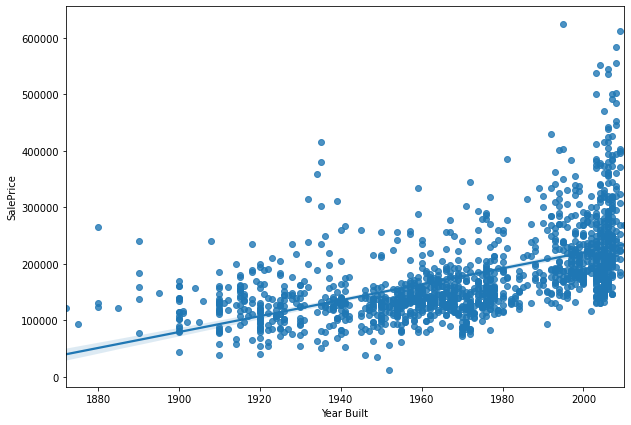

In [10]:
x = data_short['Year Built']
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.regplot(x,y, ax = ax)

Parece que el año sí puede jugar un papel importante. 

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

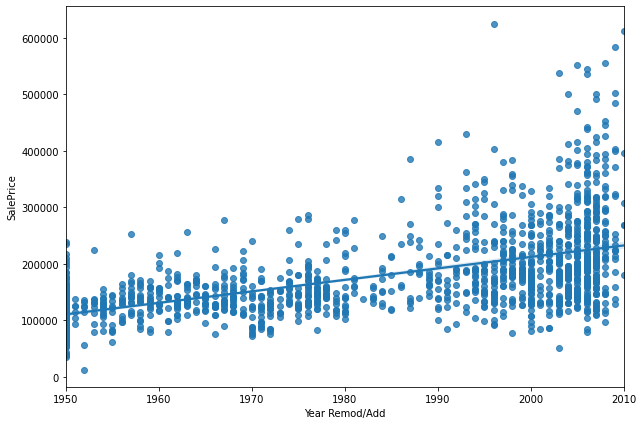

In [11]:
x = data_short['Year Remod/Add']
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.regplot(x,y, ax = ax)

El año de remodelación es irrelevante. 

## Exploremos las siguientes 10 variables. 

De hecho me salté bastantes porque quiero elegir solo las más relevantes y después ir agregando. Primero prefiero iniciar con un modelo simple. 

In [15]:
data.columns

Index(['MS Zoning', 'Lot Area', 'Neighborhood', 'Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',

In [19]:
data_2 = data[['Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
               'Total Bsmt SF', 'Heating', 
               'Heating QC', 'Central Air', 'Electrical',
               'SalePrice']]

In [21]:
profile_2 = pandas_profiling.ProfileReport(data_2, title = "Tercer Bloque")
profile_2

Solo algunas cuantas se ven relevantes. Veamos:

In [23]:
data_2.Foundation.value_counts()

PConc     654
CBlock    609
BrkTil    166
Slab       25
Stone       7
Wood        2
Name: Foundation, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

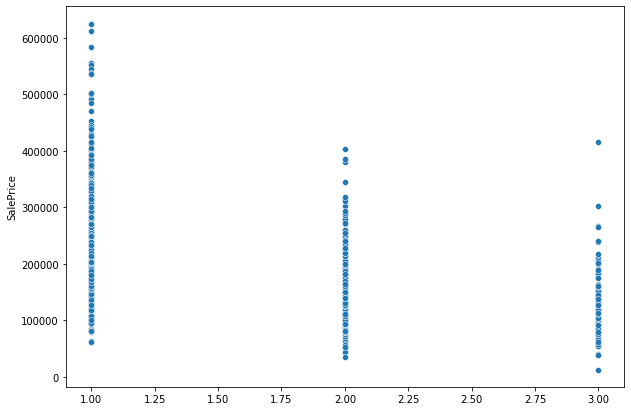

In [24]:
x = np.where(data_2.Foundation == "PConc", 1, np.where(data_2.Foundation == "CBlock", 2,
                                                      3))
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(x,y, ax = ax)

Vemos que las de concreto si son algo más caras por lo general. 

In [28]:
data_2['Bsmt Qual'].value_counts()

TA    638
Gd    631
Ex    113
Fa     44
Po      1
Name: Bsmt Qual, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

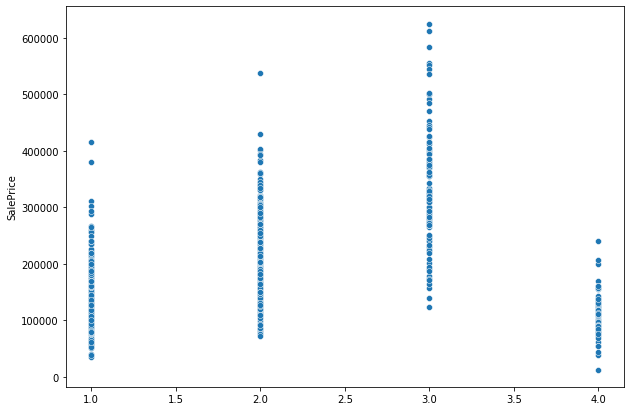

In [29]:
x = np.where(data_2['Bsmt Qual'] == "TA", 1, np.where(data_2['Bsmt Qual'] == "Gd", 2,
    np.where(data_2['Bsmt Qual'] == "Ex", 3, 4)))
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(x,y, ax = ax)

Las casas con un excelente basement sí son un poquito más caras, y las que lo tienen más bajo sí son más baratas. 

In [31]:
data_2['Heating QC'].value_counts()

Ex    741
TA    433
Gd    243
Fa     44
Po      2
Name: Heating QC, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

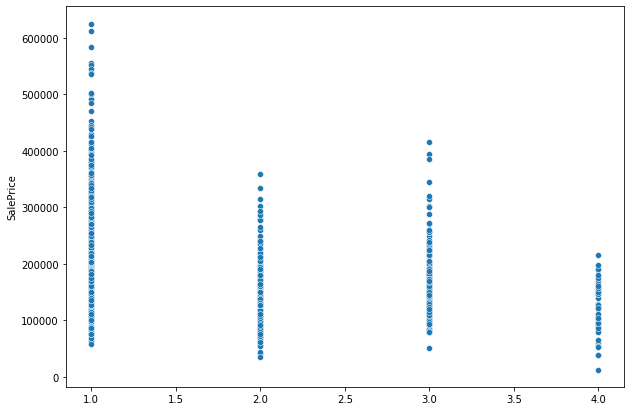

In [33]:
x = np.where(data_2['Heating QC'] == "Ex", 1, np.where(data_2['Heating QC'] == "TA", 2,
    np.where(data_2['Heating QC'] == "Gd", 3, 4)))
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(x,y, ax = ax)

In [34]:
data_2['Central Air'].value_counts()

Y    1364
N      99
Name: Central Air, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

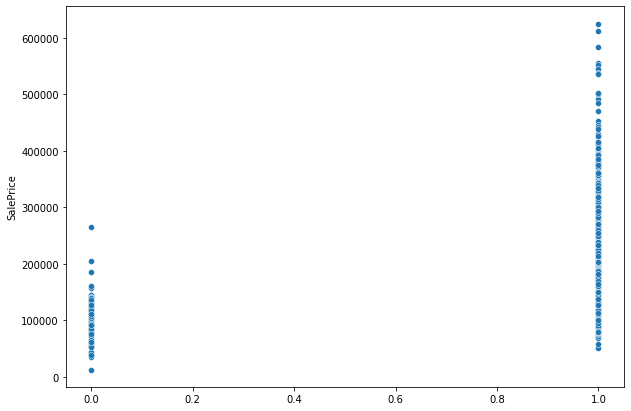

In [35]:
x = np.where(data_2['Central Air'] == "Y", 1, 0)
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(x,y, ax = ax)

In [36]:
data_2['Exter Qual'].value_counts()

TA    909
Gd    482
Ex     52
Fa     20
Name: Exter Qual, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

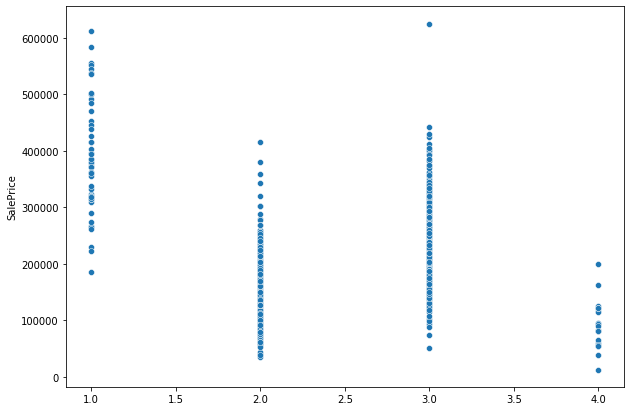

In [38]:
x = np.where(data_2['Exter Qual']== "Ex", 1, np.where(data_2['Exter Qual'] == "TA", 2,
    np.where(data_2['Exter Qual'] == "Gd", 3, 4)))
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(x,y, ax = ax)

Yo creo que esta no vale la pena. 

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

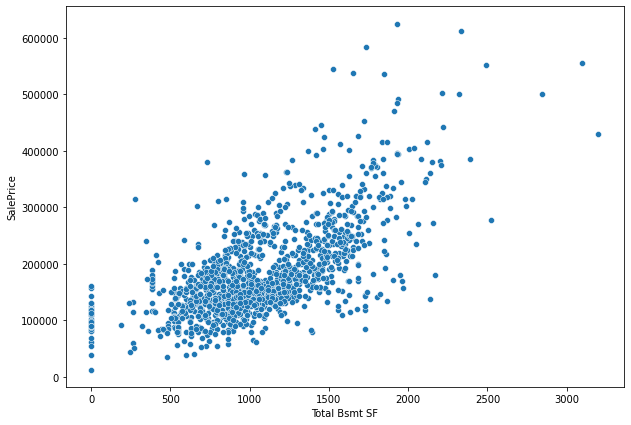

In [41]:
x = data_2['Total Bsmt SF']
y = data_2['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(x,y, ax = ax)

Esta está interesante. Vale la pena notar que claramente el área del Garage importa,
pero sería bueno ponerle una interacción para determinar primero si tiene o no Garage. 
Lo que pasa es que todas las casas que tienen cero área le están pegando a la estimación del coeficiente. 

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

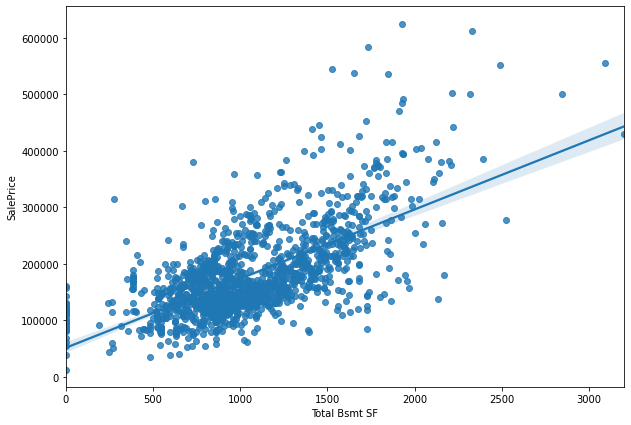

In [42]:
x = data_2['Total Bsmt SF']
y = data_2['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.regplot(x,y, ax = ax)

Si quitamos esos datos, el ajuste es mejor: 

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

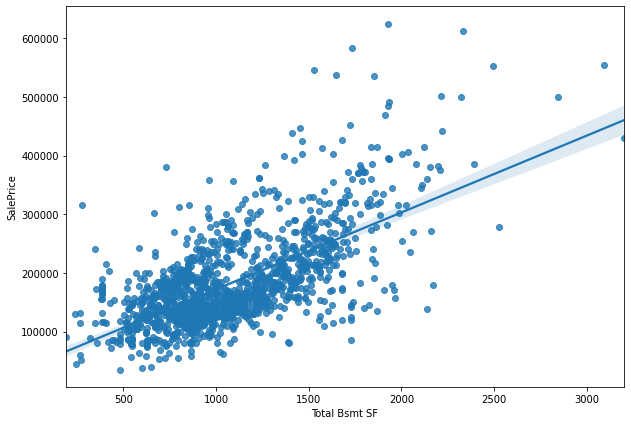

In [45]:
x = data_2[data_2['Total Bsmt SF'] > 0]['Total Bsmt SF']
y = data_2[data_2['Total Bsmt SF'] > 0]['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.regplot(x,y, ax = ax)

In [50]:
prueba = pd.DataFrame(data['House Style'].value_counts()).reset_index()
dic = {}
for i in range(1,len(prueba)):
    dic[prueba.iloc[i,0]] = i

data['House Style TEST'] = data['House Style'].map(dic)

In [52]:
dic

{'2Story': 1,
 '1.5Fin': 2,
 'SLvl': 3,
 'SFoyer': 4,
 '2.5Unf': 5,
 '1.5Unf': 6,
 '2.5Fin': 7}

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='House Style TEST', ylabel='SalePrice'>

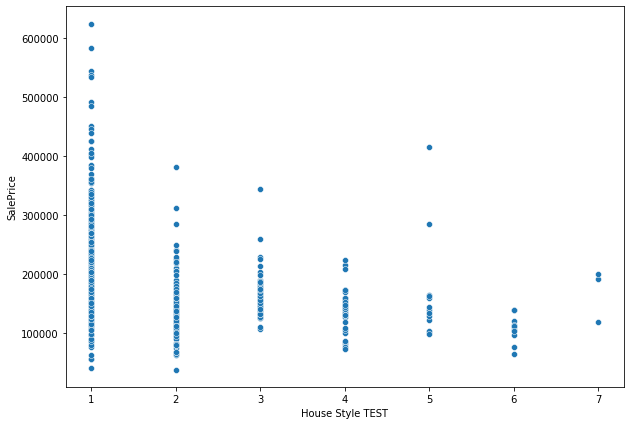

In [53]:
x = data['House Style TEST']
y = data['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(x,y, ax = ax)

Esto merece la pena más exploración. Claramente las casas que tiene 2 pisos (código 1, ver el diccionario más arriba) son las únicas que sobrepasan los 45_000 USD. 

Faltan como 35 variables, las exploraré en otro notebook, por lo pronto esta es la función que nos deja donde queremos estar:

In [54]:
def clean_dataset(path):
    data = pd.read_csv(path)
    
    #Arreglando tipos de datos
    data['MS SubClass'] = data['MS SubClass'].astype('category')
    data['MS Zoning'] = np.where(data['MS Zoning'] == "RL", 1, 0) #solo ahí se ven diferencias

    #Quitando outliers 
    data = data[data['Gr Liv Area'] < 4_000] #con esto se van todos

    #Elegimos columnas relevantes
    data = data[['MS Zoning', 'Lot Area', 'House Style', 'Overall Qual', 'Overall Cond',
                'Year Built', 'Foundation', 'Bsmt Qual', 'Heating QC', 'Central Air',
                'Total Bsmt SF', 'SalePrice']]


    #Elminando duplicados
    data = data.drop_duplicates()